<a href="https://colab.research.google.com/github/ARjunRajednrna/-AQI-Prediction-Using-Machine-Learning-/blob/main/OJT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1026 entries, 0 to 1025
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   City    1026 non-null   object 
 1   AQI     1026 non-null   object 
 2   PM2.5   1026 non-null   int64  
 3   PM10    1026 non-null   int64  
 4   O3      1026 non-null   float64
 5   NO2     1026 non-null   float64
 6   SO2     1026 non-null   float64
 7   CO      1026 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 64.3+ KB
None

Summary Statistics:
             PM2.5         PM10           O3          NO2          SO2  \
count  1026.000000  1026.000000  1026.000000  1026.000000  1026.000000   
mean    106.681287    82.171540    20.639864     7.639181     9.462183   
std      69.097321    81.103269    22.666868     7.331295    17.916884   
min       2.000000     1.000000     0.100000     0.100000     0.100000   
25%      66.000000    53.000000     7.525000     2.70

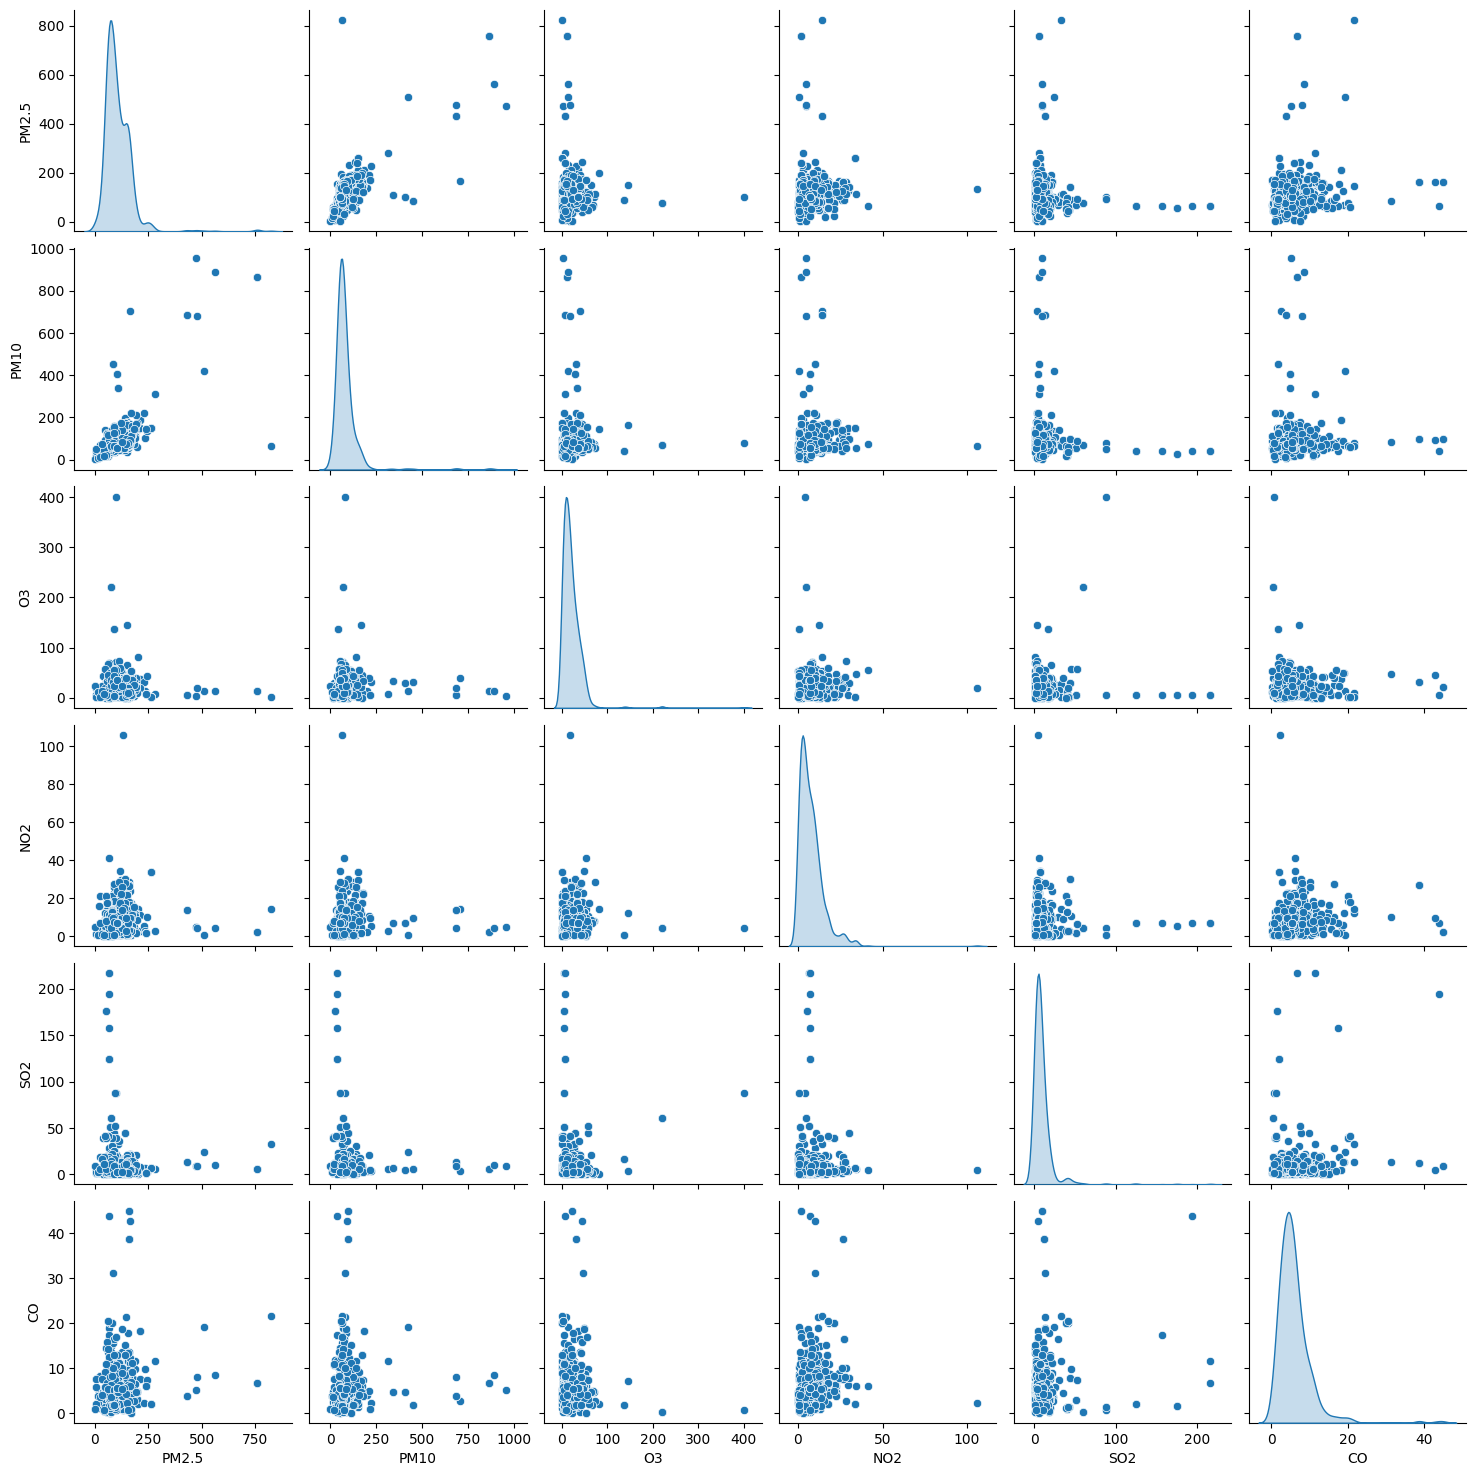

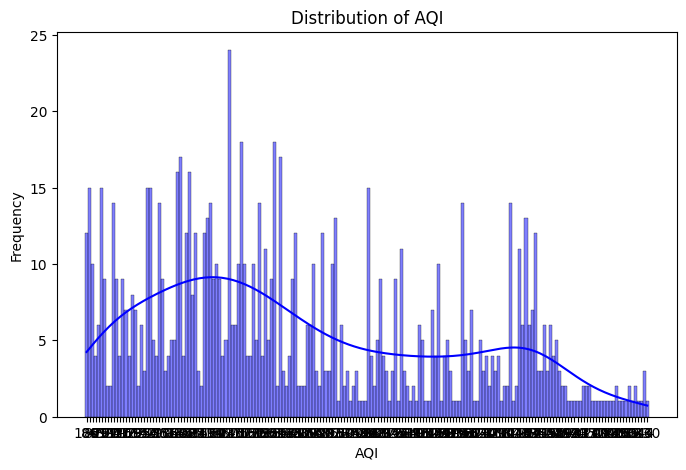

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/OJT project/dataset/AQIDataset.csv")

# Display basic information
print("Basic Info:")
print(df.info())

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Pairplot for visualization
sns.pairplot(df, diag_kind='kde')
plt.show()


# Distribution of AQI
plt.figure(figsize=(8, 5))
sns.histplot(df['AQI'], bins=30, kde=True, color='blue')
plt.title("Distribution of AQI")
plt.xlabel("AQI")
plt.ylabel("Frequency")
plt.show()





Linear Regression MSE: 637.7318040797203
Logistic Regression Accuracy: 0.9707317073170731


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                    AQI   No. Observations:                 1024
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -6091.049
Date:                Thu, 27 Mar 2025   AIC                          12194.099
Time:                        14:19:00   BIC                          12223.681
Sample:                             0   HQIC                         12205.330
                               - 1024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7691      0.015    -49.714      0.000      -0.799      -0.739
ar.L2         -0.5982      0.024    -25.124      0.000      -0.645      -0.551
ar.L3         -0.4487      0.026    -16.932      0.0

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


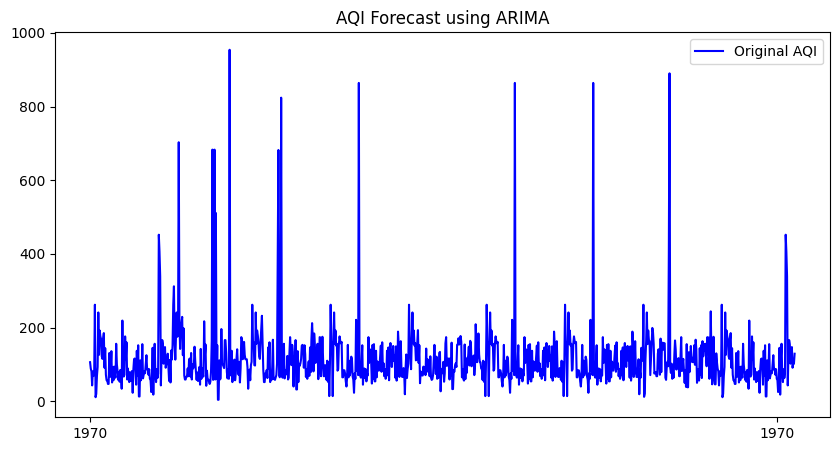

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.preprocessing import StandardScaler


# Convert AQI to numeric and handle errors
df['AQI'] = pd.to_numeric(df['AQI'], errors='coerce')  # Convert non-numeric to NaN
df.dropna(subset=['AQI'], inplace=True)  # Drop rows with NaN AQI

# Selecting Features and Target
X = df[['PM2.5', 'PM10', 'O3', 'NO2', 'SO2', 'CO']]
y = df['AQI']

# Standardize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred))

# Logistic Regression (Binary AQI Classification)
y_class = (df['AQI'] > df['AQI'].median()).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_class, test_size=0.2, random_state=42)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_class = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_class))

# ARIMA Model for AQI Forecasting
if 'AQI' in df.columns:
    df.index = pd.to_datetime(df.index, errors='coerce')  # Ensure DateTime index
    df.dropna(subset=['AQI'], inplace=True)  # Remove any remaining NaNs

    model = ARIMA(df['AQI'], order=(5,1,0))
    model_fit = model.fit()
    print(model_fit.summary())

    df['AQI_forecast'] = model_fit.predict(start=len(df), end=len(df)+10, dynamic=False)

    plt.figure(figsize=(10, 5))
    plt.plot(df.index, df['AQI'], label='Original AQI', color='blue')
    # plt.plot(df.index[-10:], df['AQI_forecast'][-10:], label='Forecasted AQI', color='red')
    plt.legend()
    plt.title("AQI Forecast using ARIMA")
    plt.show()

In [ ]:

# Logistic Regression (Binary AQI Classification)
y_class = (df['AQI'] > df['AQI'].median()).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_class, test_size=0.2, random_state=42)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_class = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_class))

Logistic Regression Accuracy: 0.9707317073170731


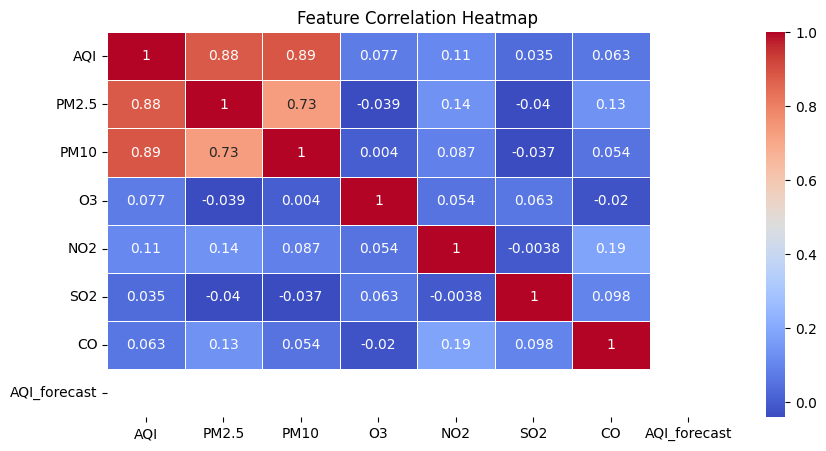

In [ ]:
# Selecting only numeric columns for correlation
df_numeric = df.select_dtypes(include=[np.number])

# Data Visualization (Correlation Heatmap)
plt.figure(figsize=(10, 5))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


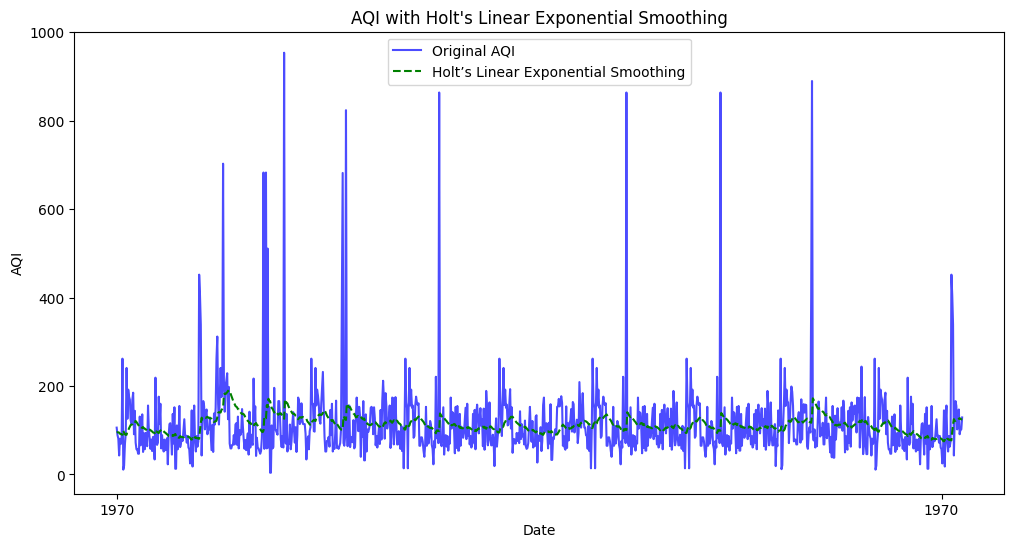

In [ ]:
# Import necessary library for Holt's Linear Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Applying Holt's Linear Exponential Smoothing (additive trend)
holt_exp_smooth = ExponentialSmoothing(df['AQI'], trend='add', seasonal=None, damped_trend=False).fit()

# Predicting smoothed values
df['AQI_Holt_Smooth'] = holt_exp_smooth.fittedvalues

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['AQI'], label='Original AQI', color='blue', alpha=0.7)
plt.plot(df.index, df['AQI_Holt_Smooth'], label='Holt’s Linear Exponential Smoothing', color='green', linestyle='dashed')
plt.title("AQI with Holt's Linear Exponential Smoothing")
plt.xlabel("Date")
plt.ylabel("AQI")
plt.legend()
plt.show()


In [ ]:
# Hybrid model

import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.linear_model import LinearRegression

# Step 1: Preprocessing
# Convert AQI to numeric and drop rows with NaN AQI
df['AQI'] = pd.to_numeric(df['AQI'], errors='coerce')  # Convert non-numeric to NaN
df.dropna(subset=['AQI'], inplace=True)  # Drop rows with NaN AQI

# Select Features and Target
X = df[['PM2.5', 'PM10', 'O3', 'NO2', 'SO2', 'CO']]
y = df['AQI']

# Scale the features for both models
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape data for CNN model (e.g., each sample becomes a 1D image with 6 channels)
X_cnn = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)

# Step 2: Train XGBoost Model
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train XGBoost model
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.05)
xg_reg.fit(X_train, y_train)

# Predictions and evaluation
y_pred_xg = xg_reg.predict(X_test)
mse_xg = mean_squared_error(y_test, y_pred_xg)
print(f"XGBoost MSE: {mse_xg}")

# Step 3: Train CNN Model
X_train_cnn, X_test_cnn, y_train_cnn, y_test_cnn = train_test_split(X_cnn, y, test_size=0.2, random_state=42)

# Define CNN model architecture
cnn_model = Sequential([
    Conv1D(64, kernel_size=2, activation='relu', input_shape=(X_train_cnn.shape[1], X_train_cnn.shape[2])),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1)
])

cnn_model.compile(optimizer=Adam(), loss='mean_squared_error')

# Train the CNN model
cnn_model.fit(X_train_cnn, y_train_cnn, epochs=50, batch_size=32, validation_data=(X_test_cnn, y_test_cnn))

# Predictions and evaluation
y_pred_cnn = cnn_model.predict(X_test_cnn)
mse_cnn = mean_squared_error(y_test_cnn, y_pred_cnn)
print(f"CNN MSE: {mse_cnn}")

# Step 4: Combine Both Models

# Get predictions from both models
y_pred_xg_train = xg_reg.predict(X_train)
y_pred_xg_test = xg_reg.predict(X_test)

y_pred_cnn_train = cnn_model.predict(X_train_cnn).flatten()
y_pred_cnn_test = cnn_model.predict(X_test_cnn).flatten()

# Combine predictions from both models (can be a simple average or use another regressor)
combined_train_preds = np.column_stack((y_pred_xg_train, y_pred_cnn_train))
combined_test_preds = np.column_stack((y_pred_xg_test, y_pred_cnn_test))

# Use a simple regressor (like linear regression) to combine the model predictions
final_model = LinearRegression()
final_model.fit(combined_train_preds, y_train)

# Final predictions and evaluation
final_preds = final_model.predict(combined_test_preds)
mse_final = mean_squared_error(y_test, final_preds)
print(f"Hybrid Model MSE: {mse_final}")

# Step 5: Calculate Accuracy (Within Threshold)

# Define a threshold for "acceptable" predictions (e.g., within 10 units)
threshold = 10

# Calculate the number of predictions within the threshold
accurate_predictions = np.abs(final_preds - y_test) <= threshold

# Calculate the accuracy as the percentage of predictions within the threshold
accuracy = np.mean(accurate_predictions) * 100
print(f"Hybrid Model Accuracy (within {threshold} units): {accuracy:.2f}%")


XGBoost MSE: 258.1316689709717


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 24789.4727 - val_loss: 14001.9961
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 28726.3047 - val_loss: 13290.5508
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 16851.2227 - val_loss: 11790.2344
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 20224.9590 - val_loss: 9226.9707
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 13442.9375 - val_loss: 6184.8599
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9663.3701 - val_loss: 3842.1045
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5494.2344 - val_loss: 2933.0930
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5591.6953 - val_loss: 2563.2822
Epoch 9/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4546.9116 - val_loss: 2276.3005
Epoch 10/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3792.8005 - val_loss: 1997.1373
Epoch 11/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4350.1367 - val_loss: 1734.6858

Logistic Regression Accuracy: 0.97
SVM Accuracy: 0.96
Hybrid Model Accuracy : 97.07%


<ipython-input-9-46aa5182c613>:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='viridis')


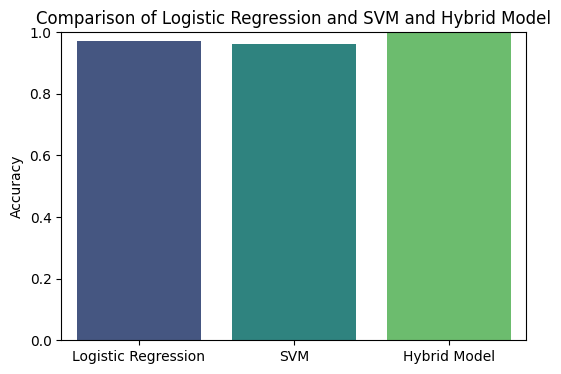

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load Data (Ensure df is already loaded)
# df = pd.read_csv("your_file.csv")  # Uncomment if loading from a file

# Convert AQI to numeric and handle errors
df['AQI'] = pd.to_numeric(df['AQI'], errors='coerce')  # Convert non-numeric to NaN
df.dropna(subset=['AQI'], inplace=True)  # Drop rows with NaN AQI

# Convert AQI to binary classes (classification problem)
threshold = df['AQI'].median()  # Using median AQI as a threshold for classification
df['AQI_Class'] = (df['AQI'] > threshold).astype(int)  # 1 if AQI > median, else 0

# Selecting Features and Target
X = df[['PM2.5', 'PM10', 'O3', 'NO2', 'SO2', 'CO']]
y = df['AQI_Class']

# Standardize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Logistic Regression Model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
accuracy_log = accuracy_score(y_test, y_pred_log)

# SVM Model
svm_model = SVC(kernel='linear')  # Using linear kernel for better interpretability
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Compare and Print Results
print(f'Logistic Regression Accuracy: {accuracy_log:.2f}')
print(f'SVM Accuracy: {accuracy_svm:.2f}')
print(f"Hybrid Model Accuracy : {accuracy:.2f}%")
# Plot Comparison
models = ['Logistic Regression', 'SVM','Hybrid Model']
accuracies = [accuracy_log, accuracy_svm,mse_final]

plt.figure(figsize=(6, 4))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Comparison of Logistic Regression and SVM and Hybrid Model')
plt.show()
